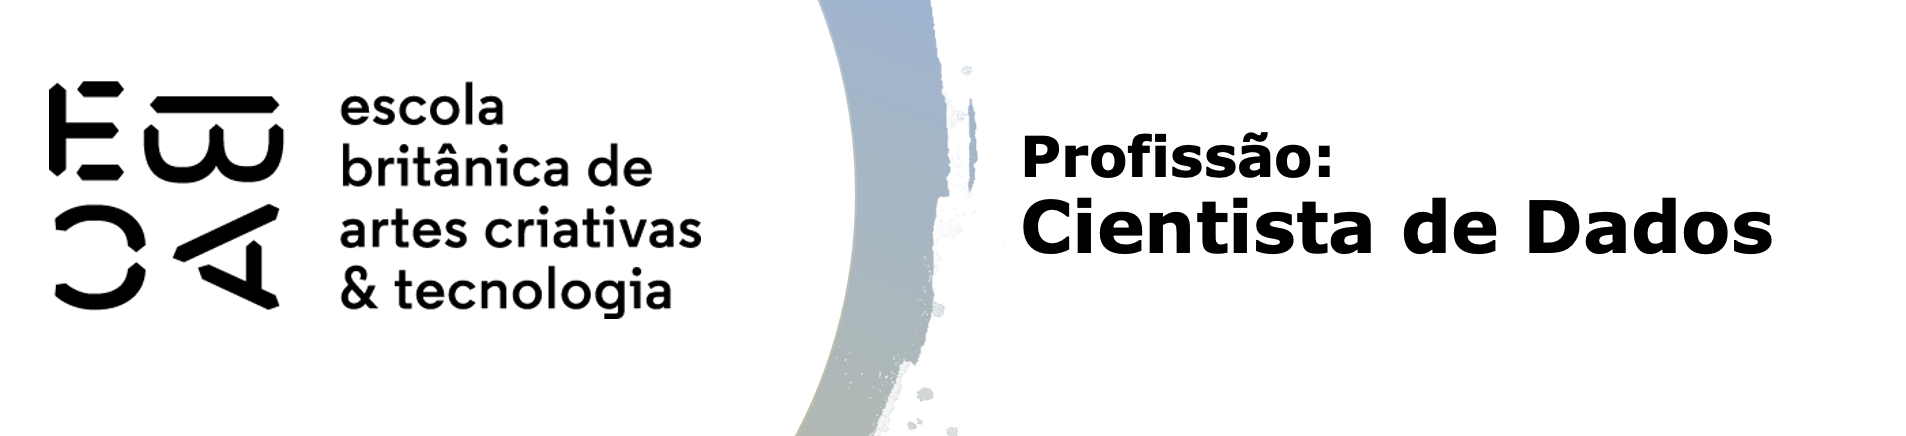

Módulo 21 <br> Professor: Lucas Serra 

# Módulo 21 - Atividade 3

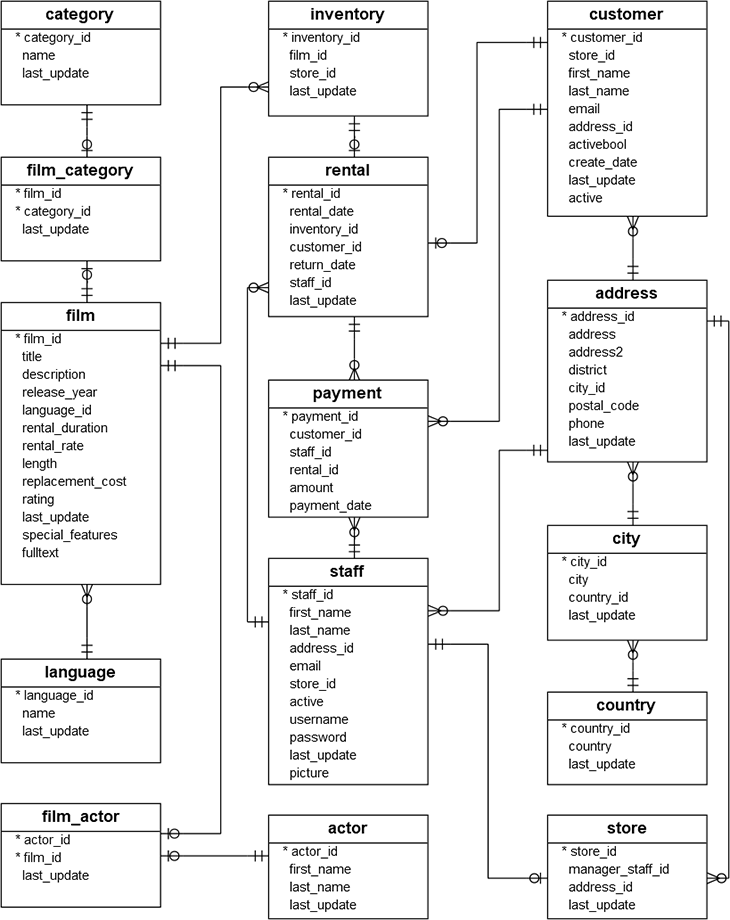

### Calcule a média por nome e sobrenome do ator da seguintes variáveis:
- rental_duration
- rental_rate
- length
- replacement_cost

### Calcule a soma de amount (preço total do aluguel) por nome, sobrenome e email do cliente (customer) e indique os 10 clientes que mais gastaram e os 10 que menos gastaram.


In [1]:
import pandas as pd
import psycopg2 as pg2

In [28]:
conn = pg2.connect(host='localhost', port=5432, dbname='dvdrental', user='postgres',password='senha123')

cur = conn.cursor()

cur.execute('''SELECT *
                FROM film as a
                    LEFT JOIN film_category as b
                        on a.film_id = b.film_id
                    LEFT JOIN category as c
                        on b.category_id = c.category_id;''')

conn.commit()

data = cur.fetchall()
colnames = [desc.name for desc in cur.description]
cur.close()
conn.close()

In [29]:
df = pd.DataFrame(data, columns=colnames)
df.head(10)

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext,film_id,category_id,last_update,category_id,name,last_update
0,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,2013-05-26 14:50:58.951,"[Deleted Scenes, Behind the Scenes]",'academi':1 'battl':15 'canadian':20 'dinosaur...,1,6,2006-02-15 10:07:09,6,Documentary,2006-02-15 09:46:27
1,2,Ace Goldfinger,A Astounding Epistle of a Database Administrat...,2006,1,3,4.99,48,12.99,G,2013-05-26 14:50:58.951,"[Trailers, Deleted Scenes]",'ace':1 'administr':9 'ancient':19 'astound':4...,2,11,2006-02-15 10:07:09,11,Horror,2006-02-15 09:46:27
2,3,Adaptation Holes,A Astounding Reflection of a Lumberjack And a ...,2006,1,7,2.99,50,18.99,NC-17,2013-05-26 14:50:58.951,"[Trailers, Deleted Scenes]",'adapt':1 'astound':4 'baloon':19 'car':11 'fa...,3,6,2006-02-15 10:07:09,6,Documentary,2006-02-15 09:46:27
3,4,Affair Prejudice,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,5,2.99,117,26.99,G,2013-05-26 14:50:58.951,"[Commentaries, Behind the Scenes]",'affair':1 'chase':14 'documentari':5 'fanci':...,4,11,2006-02-15 10:07:09,11,Horror,2006-02-15 09:46:27
4,5,African Egg,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,6,2.99,130,22.99,G,2013-05-26 14:50:58.951,[Deleted Scenes],'african':1 'chef':11 'dentist':14 'documentar...,5,8,2006-02-15 10:07:09,8,Family,2006-02-15 09:46:27
5,6,Agent Truman,A Intrepid Panorama of a Robot And a Boy who m...,2006,1,3,2.99,169,17.99,PG,2013-05-26 14:50:58.951,[Deleted Scenes],'agent':1 'ancient':19 'boy':11 'china':20 'es...,6,9,2006-02-15 10:07:09,9,Foreign,2006-02-15 09:46:27
6,7,Airplane Sierra,A Touching Saga of a Hunter And a Butler who m...,2006,1,6,4.99,62,28.99,PG-13,2013-05-26 14:50:58.951,"[Trailers, Deleted Scenes]","'airplan':1 'boat':20 'butler':11,16 'discov':...",7,5,2006-02-15 10:07:09,5,Comedy,2006-02-15 09:46:27
7,8,Airport Pollock,A Epic Tale of a Moose And a Girl who must Con...,2006,1,6,4.99,54,15.99,R,2013-05-26 14:50:58.951,[Trailers],'airport':1 'ancient':18 'confront':14 'epic':...,8,11,2006-02-15 10:07:09,11,Horror,2006-02-15 09:46:27
8,9,Alabama Devil,A Thoughtful Panorama of a Database Administra...,2006,1,3,2.99,114,21.99,PG-13,2013-05-26 14:50:58.951,"[Trailers, Deleted Scenes]",'administr':9 'alabama':1 'boat':23 'databas':...,9,11,2006-02-15 10:07:09,11,Horror,2006-02-15 09:46:27
9,10,Aladdin Calendar,A Action-Packed Tale of a Man And a Lumberjack...,2006,1,6,4.99,63,24.99,NC-17,2013-05-26 14:50:58.951,"[Trailers, Deleted Scenes]",'action':5 'action-pack':4 'aladdin':1 'ancien...,10,15,2006-02-15 10:07:09,15,Sports,2006-02-15 09:46:27


In [45]:
def connect_to_postgres(dbname):
    conn = None
    try:
        print('Conectando no PostgreSQL')
        conn = pg2.connect(host='localhost', 
                           port=5432, 
                           dbname=dbname, 
                           user='postgres',
                           password='senha123')
        print("Conectado!")
        
    except Exception as e:
        print(e)       
        conn = None
    return conn




def get_results_postgres(conn, query, fetch = 'all'):
    colnames = None
    data = None
    
    try:
        print('Cursor criado')
        cur = conn.cursor()

        print('Enviando query')
        cur.execute(query)
        print('Query executada')
        conn.commit()

        if fetch=='all':
            data = cur.fetchall()
        elif fetch=='many':
            data = cur.fetchmany()
        elif fetch=='one':
            data = cur.fetchone()
        else:
            return None

        colnames = [desc.name for desc in cur.description]
        cur.close()
        conn.close()
    except Exception as e:
        print(e)
        cur.close()
        conn.close()
    return data, colnames

def to_df(data, colnames):
    print('Transformando em dataframe')
    df = pd.DataFrame(data, columns=colnames)
    print('DF OK')
    return df

In [46]:
dbname = 'dvdrental'
query = '''SELECT *
            FROM film as a
                LEFT JOIN film_actor as b
                    on a.film_id = b.film_id
                LEFT JOIN actor as c
                    on b.actor_id = c.actor_id;'''

conn = connect_to_postgres(dbname)
data, colnames = get_results_postgres(conn, query, fetch='all')
df_results = to_df(data, colnames)

df_results.head(10)

Conectando no PostgreSQL
Conectado!
Cursor criado
Enviando query
Query executada
Transformando em dataframe
DF OK


,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext,actor_id,film_id,last_update,actor_id,first_name,last_name,last_update
0,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,2013-05-26 14:50:58.951,"[Deleted Scenes, Behind the Scenes]",'academi':1 'battl':15 'canadian':20 'dinosaur...,1.0,1.0,2006-02-15 10:05:03,1.0,Penelope,Guiness,2013-05-26 14:47:57.620
1,23,Anaconda Confessions,A Lacklusture Display of a Dentist And a Denti...,2006,1,3,0.99,92,9.99,R,2013-05-26 14:50:58.951,"[Trailers, Deleted Scenes]",'anaconda':1 'australia':18 'confess':2 'denti...,1.0,23.0,2006-02-15 10:05:03,1.0,Penelope,Guiness,2013-05-26 14:47:57.620
2,25,Angels Life,A Thoughtful Display of a Woman And a Astronau...,2006,1,3,2.99,74,15.99,G,2013-05-26 14:50:58.951,[Trailers],'angel':1 'astronaut':11 'battl':14 'berlin':1...,1.0,25.0,2006-02-15 10:05:03,1.0,Penelope,Guiness,2013-05-26 14:47:57.620
3,106,Bulworth Commandments,A Amazing Display of a Mad Cow And a Pioneer w...,2006,1,4,2.99,61,14.99,G,2013-05-26 14:50:58.951,[Trailers],'amaz':4 'bulworth':1 'command':2 'cow':9 'dis...,1.0,106.0,2006-02-15 10:05:03,1.0,Penelope,Guiness,2013-05-26 14:47:57.620
4,140,Cheaper Clyde,A Emotional Character Study of a Pioneer And a...,2006,1,6,0.99,87,23.99,G,2013-05-26 14:50:58.951,"[Trailers, Commentaries, Behind the Scenes]",'ancient':19 'charact':5 'cheaper':1 'clyde':2...,1.0,140.0,2006-02-15 10:05:03,1.0,Penelope,Guiness,2013-05-26 14:47:57.620
5,166,Color Philadelphia,A Thoughtful Panorama of a Car And a Crocodile...,2006,1,6,2.99,149,19.99,G,2013-05-26 14:50:58.951,"[Commentaries, Behind the Scenes]",'car':8 'color':1 'crocodil':11 'desert':20 'm...,1.0,166.0,2006-02-15 10:05:03,1.0,Penelope,Guiness,2013-05-26 14:47:57.620
6,277,Elephant Trojan,A Beautiful Panorama of a Lumberjack And a For...,2006,1,4,4.99,126,24.99,PG-13,2013-05-26 14:50:58.951,[Behind the Scenes],'baloon':20 'beauti':4 'eleph':1 'forens':11 '...,1.0,277.0,2006-02-15 10:05:03,1.0,Penelope,Guiness,2013-05-26 14:47:57.620
7,361,Gleaming Jawbreaker,A Amazing Display of a Composer And a Forensic...,2006,1,5,2.99,89,25.99,NC-17,2013-05-26 14:50:58.951,"[Trailers, Commentaries]",'amaz':4 'canadian':20 'car':17 'compos':8 'di...,1.0,361.0,2006-02-15 10:05:03,1.0,Penelope,Guiness,2013-05-26 14:47:57.620
8,438,Human Graffiti,A Beautiful Reflection of a Womanizer And a Su...,2006,1,3,2.99,68,22.99,NC-17,2013-05-26 14:50:58.951,"[Trailers, Behind the Scenes]",'administr':18 'beauti':4 'chase':15 'databas'...,1.0,438.0,2006-02-15 10:05:03,1.0,Penelope,Guiness,2013-05-26 14:47:57.620
9,499,King Evolution,A Action-Packed Tale of a Boy And a Lumberjack...,2006,1,3,4.99,184,24.99,NC-17,2013-05-26 14:50:58.951,"[Trailers, Deleted Scenes, Behind the Scenes]",'action':5 'action-pack':4 'baloon':21 'boy':1...,1.0,499.0,2006-02-15 10:05:03,1.0,Penelope,Guiness,2013-05-26 14:47:57.620


In [47]:
df_results['rental_rate'] = df_results['rental_rate'].astype(float)
df_results['replacement_cost'] = df_results['replacement_cost'].astype(float)

In [48]:
df_results[['first_name', 'last_name', 'rental_duration', 'rental_rate', 'length', 'replacement_cost']].groupby(['first_name', 'last_name']).mean()

rental_duration  rental_rate      length  \
first_name last_name                                             
Adam       Grant             5.277778     2.767778  122.388889   
           Hopper            4.863636     2.808182  112.272727   
Al         Garland           5.115385     2.759231  106.384615   
Alan       Dreyfuss          5.037037     2.841852  111.296296   
Albert     Johansson         5.060606     3.293030  126.636364   
...                               ...          ...         ...   
Will       Wilson            5.064516     3.054516  115.967742   
William    Hackman           4.777778     3.138148  129.074074   
Woody      Hoffman           4.580645     2.990000  120.838710   
           Jolie             4.354839     2.602903  114.935484   
Zero       Cage              4.840000     2.830000  113.240000   

                      replacement_cost  
first_name last_name                    
Adam       Grant             22.934444  
           Hopper            19.490000  
Al         Garland           19.874615  
Alan       Dreyfuss          19.360370  
Albert     Johansson         22.474848  
...                                ...  
Will       Wilson            19.957742  
William    Hackman           20.064074  
Woody      Hoffman           19.699677  
           Jolie             19.409355  
Zero       Cage              19.910000  

[199 rows x 4 columns]

In [39]:
dbname = 'dvdrental'
query = '''SELECT *
            FROM payment as a
                LEFT JOIN customer as b
                    on a.customer_id = b.customer_id;'''

conn = connect_to_postgres(dbname)
data, colnames = get_results_postgres(conn, query, fetch='all')
df_results = to_df(data, colnames)

df_results.head(10)

Conectando no PostgreSQL
Conectado!
Cursor criado
Enviando query
Query executada
Transformando em dataframe
DF OK


,payment_id,customer_id,staff_id,rental_id,amount,payment_date,customer_id,store_id,first_name,last_name,email,address_id,activebool,create_date,last_update,active
0,17503,341,2,1520,7.99,2007-02-15 22:25:46.996577,341,1,Peter,Menard,peter.menard@sakilacustomer.org,346,True,2006-02-14,2013-05-26 14:49:45.738,1
1,17504,341,1,1778,1.99,2007-02-16 17:23:14.996577,341,1,Peter,Menard,peter.menard@sakilacustomer.org,346,True,2006-02-14,2013-05-26 14:49:45.738,1
2,17505,341,1,1849,7.99,2007-02-16 22:41:45.996577,341,1,Peter,Menard,peter.menard@sakilacustomer.org,346,True,2006-02-14,2013-05-26 14:49:45.738,1
3,17506,341,2,2829,2.99,2007-02-19 19:39:56.996577,341,1,Peter,Menard,peter.menard@sakilacustomer.org,346,True,2006-02-14,2013-05-26 14:49:45.738,1
4,17507,341,2,3130,7.99,2007-02-20 17:31:48.996577,341,1,Peter,Menard,peter.menard@sakilacustomer.org,346,True,2006-02-14,2013-05-26 14:49:45.738,1
5,17508,341,1,3382,5.99,2007-02-21 12:33:49.996577,341,1,Peter,Menard,peter.menard@sakilacustomer.org,346,True,2006-02-14,2013-05-26 14:49:45.738,1
6,17509,342,2,2190,5.99,2007-02-17 23:58:17.996577,342,1,Harold,Martino,harold.martino@sakilacustomer.org,347,True,2006-02-14,2013-05-26 14:49:45.738,1
7,17510,342,1,2914,5.99,2007-02-20 02:11:44.996577,342,1,Harold,Martino,harold.martino@sakilacustomer.org,347,True,2006-02-14,2013-05-26 14:49:45.738,1
8,17511,342,1,3081,2.99,2007-02-20 13:57:39.996577,342,1,Harold,Martino,harold.martino@sakilacustomer.org,347,True,2006-02-14,2013-05-26 14:49:45.738,1
9,17512,343,2,1547,4.99,2007-02-16 00:10:50.996577,343,1,Douglas,Graf,douglas.graf@sakilacustomer.org,348,True,2006-02-14,2013-05-26 14:49:45.738,1


In [40]:
df_results['amount'] = df_results['amount'].astype(float)

In [41]:
customer_results = df_results[['first_name', 'last_name', 'email', 'amount']].groupby(['first_name', 'last_name', 'email']).sum()
customer_results

,,,amount
first_name,last_name,email,
Aaron,Selby,aaron.selby@sakilacustomer.org,88.80
Adam,Gooch,adam.gooch@sakilacustomer.org,97.80
Adrian,Clary,adrian.clary@sakilacustomer.org,68.82
Agnes,Bishop,agnes.bishop@sakilacustomer.org,86.79
Alan,Kahn,alan.kahn@sakilacustomer.org,119.75
...,...,...,...
Willie,Markham,willie.markham@sakilacustomer.org,85.78
Wilma,Richards,wilma.richards@sakilacustomer.org,91.80
Yolanda,Weaver,yolanda.weaver@sakilacustomer.org,102.75


In [42]:
customer_results['amount'].nlargest(n=10)

first_name  last_name  email                            
Eleanor     Hunt       eleanor.hunt@sakilacustomer.org      211.55
Karl        Seal       karl.seal@sakilacustomer.org         208.58
Marion      Snyder     marion.snyder@sakilacustomer.org     194.61
Rhonda      Kennedy    rhonda.kennedy@sakilacustomer.org    191.62
Clara       Shaw       clara.shaw@sakilacustomer.org        189.60
Tommy       Collazo    tommy.collazo@sakilacustomer.org     183.63
Ana         Bradley    ana.bradley@sakilacustomer.org       167.67
Curtis      Irby       curtis.irby@sakilacustomer.org       167.62
Marcia      Dean       marcia.dean@sakilacustomer.org       166.61
Mike        Way        mike.way@sakilacustomer.org          162.67
Name: amount, dtype: float64